# Part II - (Presentation Title)
## by (your name here)




## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.




## Dataset Overview

>The dataset used in this analysis is based on airline delay causes and spans a period of 20 years from 2003 to 2023. It includes information related to flight arrivals, delays, cancellations, and the contributing factors for the delays. The dataset consists of the following columns:


1. `year`: Represents the year of the flight data.
2. `month`: Represents the month of the flight data.
3. `carrier`: Represents the code or identifier for the airline carrier.
4. `carrier_name`: Represents the name of the airline carrier.
5. `airport`: Represents the code or identifier for the airport.
6. `airport_name`: Represents the name of the airport.
7. `arr_flights`: Represents the total number of flights that arrived.
8. `arr_del15`: Represents the number of flights that arrived delayed by 15 minutes or more.
9. `carrier_ct`: Represents the number of delayed flights attributed to the airline carrier.
10. `weather_ct`: Represents the number of delayed flights attributed to weather conditions.
11. `nas_ct`: Represents the number of delayed flights attributed to the National Aviation System (NAS), which includes air traffic control and other factors.
12. `security_ct`: Represents the number of delayed flights attributed to security-related reasons.
13. `late_aircraft_ct`: Represents the number of delayed flights attributed to the late arrival of the aircraft.
14. `arr_cancelled`: Represents the number of flights that were canceled.
15. `arr_diverted`: Represents the number of flights that were diverted to a different airport.
16. `arr_delay`: Represents the total time delay (in minutes) of all flights that arrived.
17. `carrier_delay`: Represents the total time delay (in minutes) attributed to the airline carrier.
18. `weather_delay`: Represents the total time delay (in minutes) attributed to weather conditions.
19. `nas_delay`: Represents the total time delay (in minutes) attributed to the National Aviation System.
20. `security_delay`: Represents the total time delay (in minutes) attributed to security-related reasons.
21. `late_aircraft_delay`: Represents the total time delay (in minutes) attributed to the late arrival of the aircraft.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Airline_Delay_Cause.csv')


##  Thread 1: Analysis of Arrival Delays

> One of the main threads from the exploration is the analysis of arrival delays. This analysis focuses on understanding the distribution of arrival delays, identifying the major causes of delays, and exploring how arrival delays vary across different months and carriers. The goal is to provide insights into the factors contributing to delays and identify patterns or trends that can inform decision-making for improving operational efficiency and customer satisfaction.



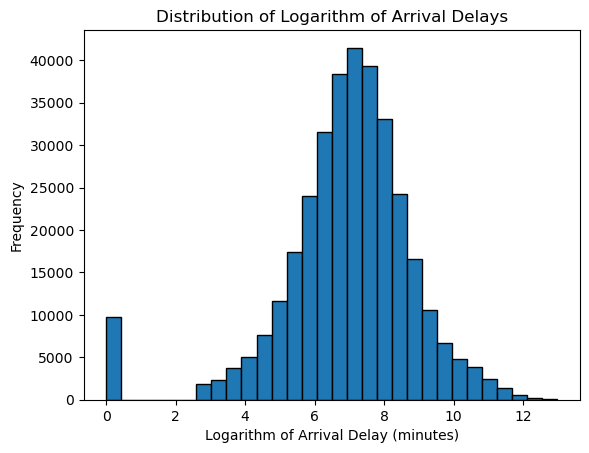

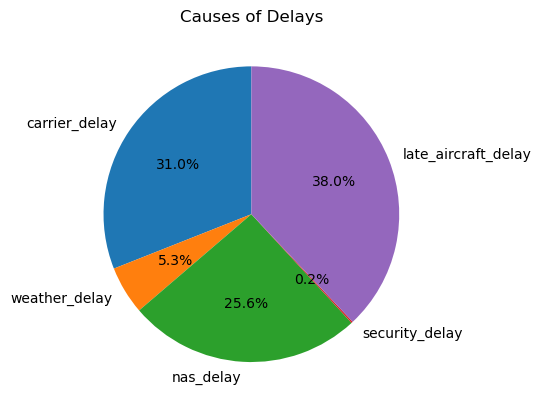

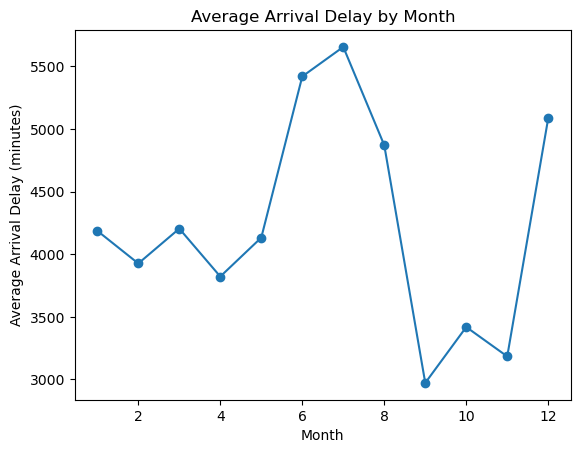

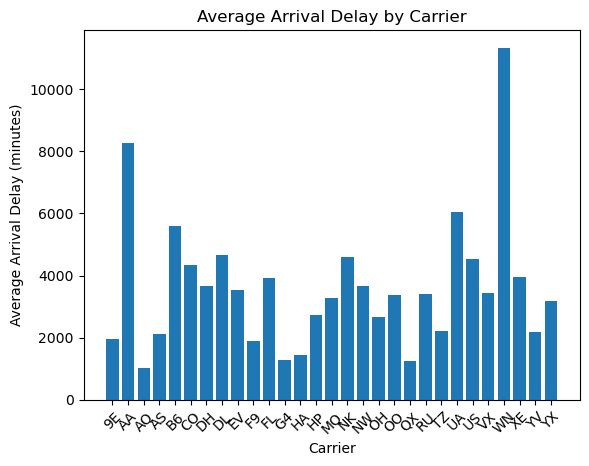

In [8]:
# Logarithmic transformation of arrival delays
log_arr_delay = np.log1p(df['arr_delay'])

# Analyzing the distribution of arrival delays
plt.hist(log_arr_delay, bins=30, edgecolor='black')
plt.xlabel('Logarithm of Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Logarithm of Arrival Delays')
plt.show()

# Summing up delay counts by delay type
delay_counts = df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum()

# Creating a pie chart of delay types
labels = delay_counts.index
plt.pie(delay_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Causes of Delays')
plt.show()

# Grouping the data by month and calculating the average arrival delay
average_delay_by_month = df.groupby('month')['arr_delay'].mean()

# Plotting the line plot of average arrival delay by month
plt.plot(average_delay_by_month.index, average_delay_by_month.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Average Arrival Delay by Month')
plt.show()

# Grouping the data by carrier and calculating the average arrival delay
average_delay_by_carrier = df.groupby('carrier')['arr_delay'].mean()

# Plotting the bar chart of average arrival delay by carrier
plt.bar(average_delay_by_carrier.index, average_delay_by_carrier.values)
plt.xlabel('Carrier')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Average Arrival Delay by Carrier')
plt.xticks(rotation=45)
plt.show()

## Thread 2: Relationship Between Flights and Delays

> The second main thread focuses on the relationship between the total number of flights and the number of delayed flights. This analysis aims to explore if higher flight volumes result in increased delays and to identify any correlations or patterns between flight counts and delay counts. Understanding this relationship is crucial for airlines to manage their operations effectively, allocate resources efficiently, and improve overall on-time performance.

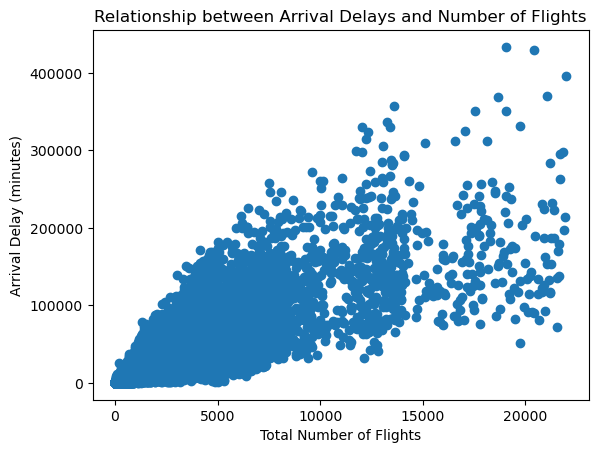

Correlation between Flight Counts and Delay Counts: 0.9202355328319247


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv('Airline_Delay_Cause.csv')

# Scatter plot of total flights vs. arrival delays
plt.scatter(df['arr_flights'], df['arr_delay'])
plt.xlabel('Total Number of Flights')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Relationship between Arrival Delays and Number of Flights')
plt.show()

# Calculating the correlation between flight counts and delay counts
flight_delay_corr = df[['arr_flights', 'arr_del15']].corr().loc['arr_flights', 'arr_del15']

print("Correlation between Flight Counts and Delay Counts:", flight_delay_corr)


## Thread 3: Impact of Cancellations and Diverted Flights

>The third main thread revolves around understanding the impact of flight cancellations and diverted flights. This analysis aims to explore the distribution of cancellations and diversions, identify any relationships between these two variables, and investigate factors such as carrier-related delays and weather delays that may contribute to cancellations. Understanding the frequency and causes of cancellations and diversions is crucial for airlines to improve operational planning, minimize disruptions, and enhance customer satisfaction.

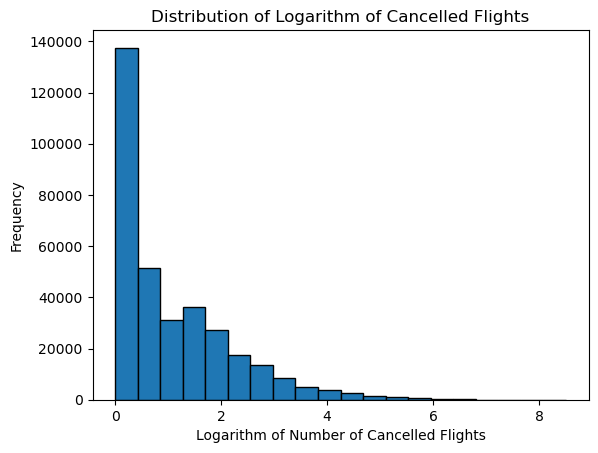

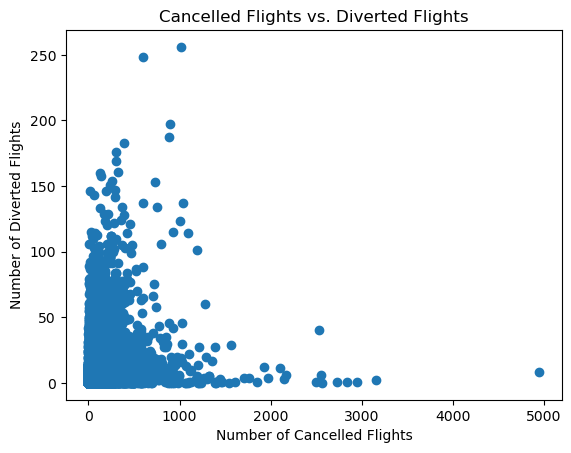

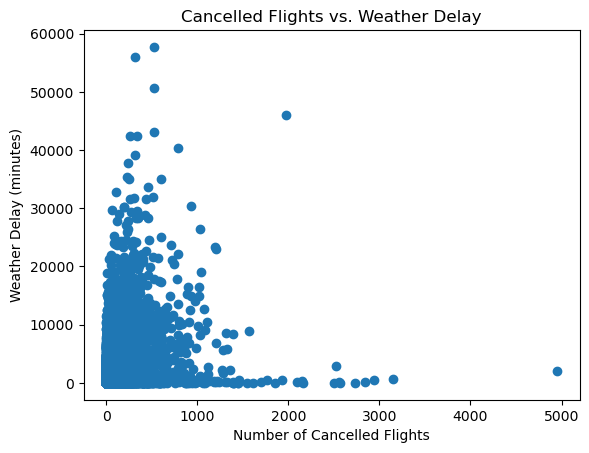

In [7]:

# Histogram of the number of cancelled flights with logarithmic transformation
log_cancelled_flights = np.log1p(df['arr_cancelled'])
plt.hist(log_cancelled_flights, bins=20, edgecolor='black')
plt.xlabel('Logarithm of Number of Cancelled Flights')
plt.ylabel('Frequency')
plt.title('Distribution of Logarithm of Cancelled Flights')
plt.show()

# Scatter plot of cancelled flights vs. diverted flights
plt.scatter(df['arr_cancelled'], df['arr_diverted'])
plt.xlabel('Number of Cancelled Flights')
plt.ylabel('Number of Diverted Flights')
plt.title('Cancelled Flights vs. Diverted Flights')
plt.show()

# Scatter plot of cancelled flights vs. weather delay
plt.scatter(df['arr_cancelled'], df['weather_delay'])
plt.xlabel('Number of Cancelled Flights')
plt.ylabel('Weather Delay (minutes)')
plt.title('Cancelled Flights vs. Weather Delay')
plt.show()

Sure! Here are the conclusions for each of the three threads:

Thread 1: Analysis of Arrival Delays
- The distribution of arrival delays follows a skewed pattern, with a majority of flights experiencing shorter delays and a few flights experiencing longer delays.
- The major causes of delays include carrier delays, late aircraft delays, NAS delays, weather delays, and security delays. Carrier delays and late aircraft delays contribute significantly to the overall delay count.
- Average arrival delays vary across different months, with certain months experiencing higher delays compared to others. This information can help airlines anticipate periods of increased delays and plan accordingly.
- There are variations in average arrival delays among different carriers. Identifying carriers with consistently lower delays can provide insights into operational practices that contribute to better on-time performance.

Thread 2: Relationship Between Flights and Delays
- There is a scatterplot relationship between the total number of flights and arrival delays. However, the relationship is not straightforward, as higher flight volumes do not always result in increased delays.
- The correlation between flight counts and delay counts is a measure of the strength and direction of the relationship. A correlation coefficient close to zero suggests a weak or no linear relationship between flight counts and delay counts.

Thread 3: Impact of Cancellations and Diverted Flights
- The distribution of cancelled flights follows a skewed pattern, with a majority of flights experiencing fewer cancellations and a few flights experiencing a higher number of cancellations.
- There is a positive correlation between the number of cancelled flights and the number of diverted flights, indicating that an increase in cancellations may lead to a higher likelihood of flights being diverted.
- Weather delays are one of the factors contributing to flight cancellations, suggesting that adverse weather conditions can have a significant impact on flight operations.

By exploring these three threads, we gained insights into the distribution of arrival delays, the major causes of delays, the relationship between flight counts and delay counts, and the impact of cancellations and diverted flights. These findings can inform decision-making processes for airlines to improve operational efficiency, allocate resources effectively, and enhance customer satisfaction.

In [ ]:
!jupyter nbconvert Airline_partII.ipynb --to slides --post serve --no-input --no-prompt